In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)
# Si copiamos ese path nos llevará a la carpeta donde se descargó el dataset

Path to dataset files: C:\Users\Edward\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [6]:
#Importando pandas
import pandas as pd

In [7]:
# usando pandas para leer el csv
df = pd.read_csv(path + "/books.csv")
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [8]:
# Install seaborn if not already installed
%pip install seaborn

# Importando seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


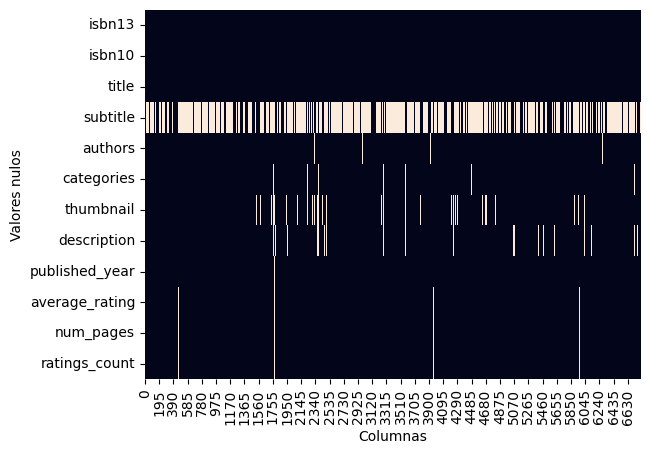

In [9]:
# Elaborando un mapa de Calor para ver un patrón o correlación entre los valores nulos en el dataset
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False, ax=ax)

plt.xlabel("Columnas")
plt.ylabel("Valores nulos")

plt.show()
# Explica lo que hacen las lineas anteriores:
# 1. Importamos seaborn y matplotlib
# 2. Creamos un eje para el heatmap
# 3. Creamos el heatmap con seaborn
# 4. Agregamos etiquetas al heatmap
# 5. Mostramos el heatmap
# Y porque hace eso, que es lo que busca hacaer?
# Se busca mostrar la cantidad de valores nulos por columna en el dataset
# Y como funciona ese grafico?
# Muestra en blanco las celdas que tienen
# valores n
# De este mapa de calor podemos ver que subtitle falta en la mayoría de los libros, y que la mayoría de los libros no tienen una descripción.
# puedes explicarme como funciona el mapa de calor y que información nos da?
# El mapa de calor muestra en blanco las celdas que tienen valores nulos, y en 

# Analizando el gráfico anterior 
Podemos ver que para los 3 valores de abajo: avergae_rating, num_pages y ratings_count Hay un patrón claro, donde falta una por ejm average_rating falta tambien en las otras como num_pages y ratings_count, por lo que podemos concluir que probablemente sean de otro conjunto de datos y ese dataset no contenia todos los libros de ese dataset mas grande.

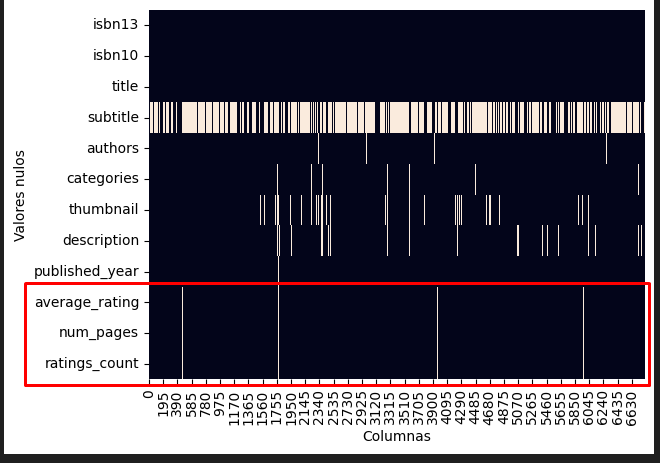

# Creando una representación numérica de los libros que le faltan Descripción


#### Vamos a buscar la relación entre los libros que les falta la descripción puede ser porque son libros mas antiguos u por otra razón.

In [10]:
import numpy as np
# Vamos a usar el metodo de desgaste numerico para ver la cantidad de valores nulos en cada columna
df["missing_description"] = np.where(df["description"].isna(), 1, 0)
# Lo que hace el codigo anterior es colocar un 0 en la columna missing_description si la columna description no tiene valores nulos, y un 1 si tiene valores nulos

# Convirtiendo la columna año del libro en una nueva columna llamada edad del libro.
df["age_of_book"] = pd.to_datetime(df["published_year"], errors="coerce")

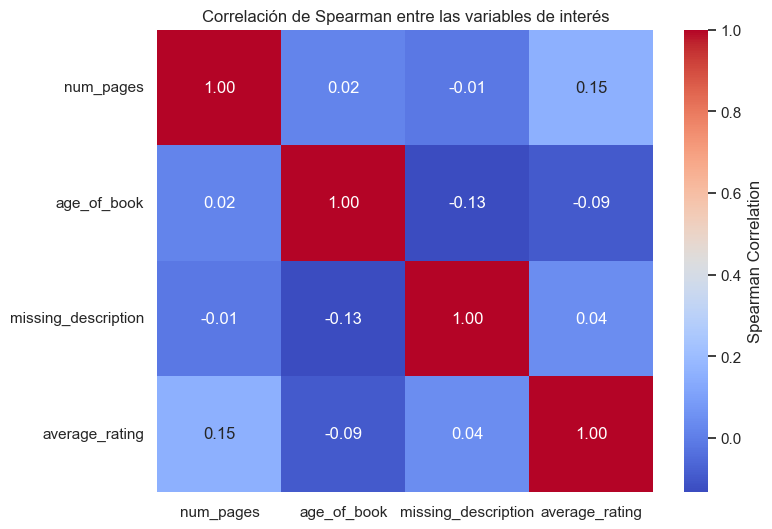

In [11]:
# Creando una lista con las columnas que nos interesan
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# Creando ahora una matriz de correlación directamente del marco de pandas usando solo esas columnas 
# Se está usando la correlación de spearman en lugar de la correlación de Pearson porque la correlación de Pearson asume que las variables 
# son normalmente distribuidas, lo cual no es el caso para la mayoría de las variables en este conjunto de datos. En este dataset, las variables
# son continuas y no necesariamente normalmente distribuidas, por lo que la correlación de Spearman es más adecuada. 
# Una variable Continua es una variable que puede tomar cualquier valor dentro de un rango determinado, mientras que una variable normalmente distribuida
# es una variable que tiene una distribución normal, es decir, una distribución en forma de campana. 
# Un ejemplo de una variable continua es la edad, mientras que un ejemplo de una variable normalmente distribuida es la altura. Esto es porque la edad puede
# tomar cualquier valor dentro de un rango determinado, mientras que la altura puede tomar cualquier valor dentro de un rango determinado y tiene una distribución
# en forma de campana.
correlation_matrix = df[columns_of_interest].corr(method="spearman")
# Convirtiendo la matriz de correlación en un mapa de calor
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
# Pasando la matriz de correlación a un mapa de calor
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlación de Spearman entre las variables de interés")
plt.show()